# Visualizing the History of Nobel Prize Winners
The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

Project instructions:

Analyze Nobel Prize winner data and identify patterns by answering the following questions:

- What is the most commonly awarded gender and birth country? Storing the string answers as `top_gender` and `top_country`.
- What decade had the highest proportion of US-born winners? Store this as an integer called `max_decade_usa`.
- What decade and category pair had the highest proportion of female laureates? Store this as a dictionary called `max_female_dict` where the decade is the key and the category is the value.
- Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as `first_woman_name` and `first_woman_category`.
- Which individuals or organizations have won multiple Nobel Prizes throughout the years? Store the full names in a list named `repeat_list`.

In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [107]:
nobel_data = pd.read_csv("data/nobel.csv")
nobel_data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [108]:
nobel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

- What is the most commonly awarded gender and birth country? Storing the string answers as `top_gender` and `top_country`.

In [109]:
top_gender = nobel_data["sex"].value_counts().index.tolist()[0]
print(top_gender)

Male


In [110]:
top_country = nobel_data["birth_country"].value_counts().index.to_list()[0]
print(top_country)

United States of America


- What decade had the highest proportion of US-born winners? Store this as an integer called `max_decade_usa`.

To calculate the proportion, first create a column that creates a flag for winners whose birth country is "United States of America", then create a decade column, and use both to find the proportion.

In [111]:
nobel_data["usa_born_winner"] = nobel_data["birth_country"] == "United States of America"

In [112]:
nobel_data["decade"] = np.floor(nobel_data["year"] / 10) * 10
nobel_data["decade"] = nobel_data["decade"].astype(int)

In [113]:
nobel_data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900


In [114]:
proportions = nobel_data.groupby("decade", as_index=False)["usa_born_winner"].mean()
print(proportions)

    decade  usa_born_winner
0     1900         0.017544
1     1910         0.075000
2     1920         0.074074
3     1930         0.250000
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
7     1970         0.317308
8     1980         0.319588
9     1990         0.403846
10    2000         0.422764
11    2010         0.292683


In [115]:
max_decade_usa = int(proportions.max().values[0])
print(max_decade_usa)

2010


c:\Users\jcampost\AppData\Local\anaconda3\envs\data-scientist-track\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


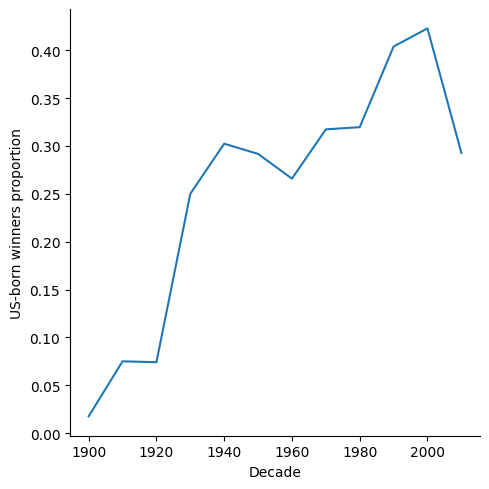

In [119]:
g = sns.relplot(data= proportions, x="decade", y="usa_born_winner", kind="line")
g.set(xlabel="Decade", ylabel="US-born winners proportion")
plt.show()